In [12]:
import jieba
import math
import os
import re
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
from wordcloud import WordCloud
from zhon.hanzi import punctuation

In [2]:
#loading data
contents = [line.strip().replace('\n','') for line in open('hw1-dataset.txt','r').readlines()]
# stopwords = [line.strip().replace('\n','') for line in open('/content/drive/MyDrive/Colab Notebooks/nlp2023/hw1/stopwords.txt','r').readlines()]
punctuations = [line.strip().replace('\n','') for line in open('punctuation.txt','r').readlines()]
jieba.load_userdict('userDict.txt')
punctuation = list(punctuation)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 2.156 seconds.
DEBUG:jieba:Loading model cost 2.156 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [3]:
#processing paragraphs
word_counts = [] #apperance of words 
for i in range(len(contents)):
    contents[i] = contents[i].replace('\t','').replace('\u3000','')
    contents[i] = re.sub('[^\u4e00-\u9fa5]','',contents[i])
    contents[i] = jieba.lcut(contents[i])
    count = {}
    for word in contents[i]:
    if word not in punctuations and word != " " and word not in punctuation:
        if word in count:
            count[word]+=1
        else:
            count[word] = 1
    word_counts.append(count)
      

In [4]:
#calculate words' frequency
word_frequency = []
word_total_occurrence = {}
for word_count in word_counts:
    all_count = sum(word_count.values())
    freq = {}
    for word,count in word_count.items():
        freq[word] = round(count/all_count,4)
        if word in word_total_occurrence:
            word_total_occurrence[word] += count
        else:
            word_total_occurrence[word] = count
        word_frequency.append(freq)
word_total_occurrence = (sorted(dict(word_total_occurrence).items(),key = lambda x:x[1],reverse = True))

In [5]:
#making word_counts list into a full list
all_words = []
for word in word_counts:
    all_words.extend(list(word.keys()))


In [6]:
#calcluate the word occurences
word_occurrence = {}
for word in all_words:
    if word in word_occurrence:
        word_occurrence[word] += 1
    else:
        word_occurrence[word] = 1

In [7]:
#calculate idf value
idf = []
for word_count in word_counts:
    invertFreq = {}
    for word in word_count.keys():
        occurrence = word_occurrence[word]
        invertFreq[word] = math.log(round(len(word_counts)/occurrence),4)
        # print(len(word_counts)," ",occurrence,word)
        idf.append(invertFreq)
# print(list(sorted(idf.items(),key = lambda x:x[1],reverse = True)[:100]))

In [8]:
#organize into a list of tf_idf values
all_tf_idf = []
for i,word in enumerate(word_frequency):
    tf_idf = {}
    for word,freq in word.items():
        tf_idf[word] = freq*idf[i][word]
    all_tf_idf.append(tf_idf)

In [9]:
#calculate top 100 tf words
top_100_frequency = []
for wfreq in word_frequency:
    if len(wfreq)>0:
        top_100_frequency.append((max(wfreq.items())))
top_100_frequency.sort(key = lambda x : x[1],reverse = True)
# print(top_100_frequency[:100])

In [10]:
#calculate the top 100 tf_idf values
top_100_tf_idf = []
for tf_idf in all_tf_idf:
    if len(tf_idf)>0:
        top_100_tf_idf.append((max(tf_idf.items())))
top_100_tf_idf.sort(key = lambda x : x[1],reverse = True)
# print(top_100_tf_idf[:100])

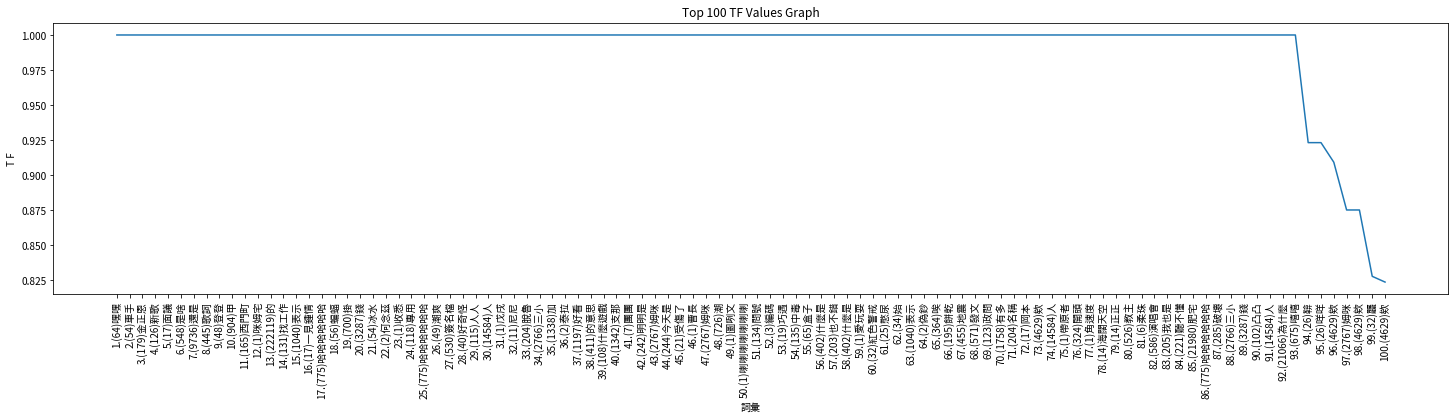

In [11]:
#plot figures
x = []
y = []
i = 0
for word in top_100_frequency[:100]:
    i+=1
    x.append(str(i)+"."+"("+str(dict(word_total_occurrence)[str(word[0])])+")"+str(word[0]))
    y.append(word[1])
plt.figure(figsize = (25,5))
plt.plot(x,y)
plt.title("Top 100 TF Values Graph")
plt.xlabel("詞彙")
plt.ylabel("T F")
plt.xticks(rotation = 90)
plt.show()

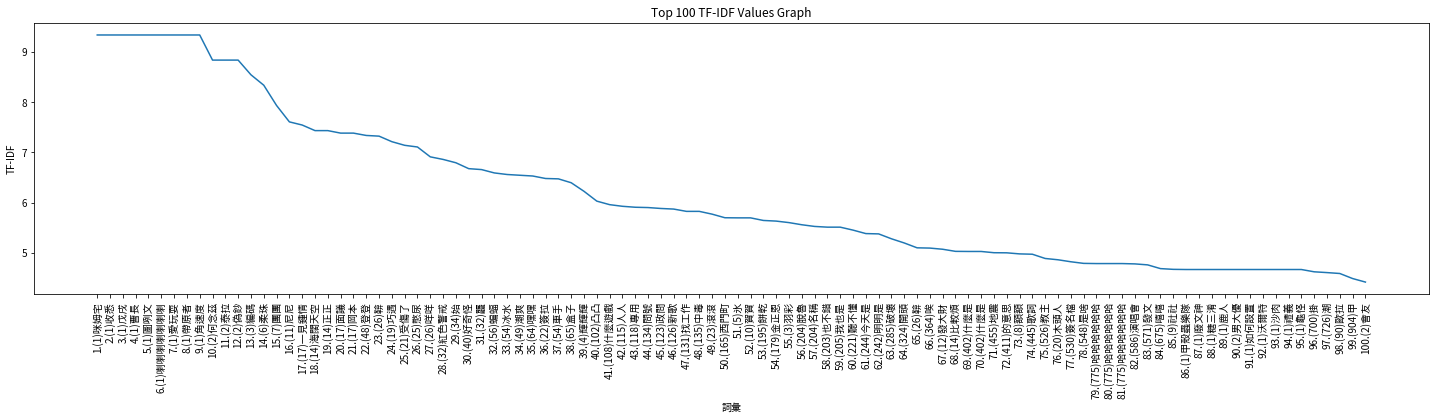

In [12]:
x = []
y = []
i = 0
for word in top_100_tf_idf[:100]:
    i+=1
    x.append(str(i)+"."+"("+str(dict(word_total_occurrence)[str(word[0])])+")"+str(word[0]))
    y.append(word[1])
plt.figure(figsize = (25,5))
plt.plot(x,y)
plt.title("Top 100 TF-IDF Values Graph")
plt.xlabel("詞彙")
plt.ylabel("TF-IDF")
plt.xticks(rotation = 90)
plt.show()

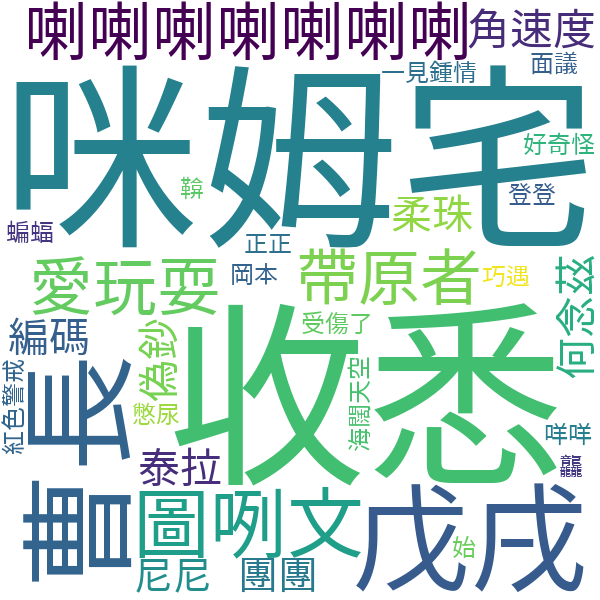

In [13]:
WordCloud(collocations=False, 
                font_path='/content/drive/MyDrive/Colab Notebooks/nlp2023/hw1/TaipeiSansTCBeta-Regular.ttf', 
                width=600,
                height=600,
                background_color = "white" ,
                margin=2
                ).generate_from_frequencies(dict(top_100_tf_idf[:32])).to_image()